## Solution 4

In [44]:
import numpy as np
from scipy.integrate import trapz, simps, quad
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

In [5]:
def my_num_int(f, a, b, n, option):
    x = np.linspace(a, b, n)
    y = f(x)
    h = (b - a) / (n - 1)
    if option == 'rect':
        return h * sum(y[1::])
    elif option == 'trap':
        return trapz(y, x)
    elif option == 'simp':
        return simps(y, x)

In [14]:
f = lambda x: np.exp(x**2)
my_num_int(f, -1, 1, 100001, 'simp')

2.9253034918143634

## Solution 5

In [40]:
def my_fourier_coef(f, n):
    
    def cosn(x):
        return f(x) * np.cos(n*x)
    
    def sinn(x):
        return f(x) * np.sin(n*x)
    
    An = quad(cosn, -np.pi, np.pi)[0]/np.pi
    Bn = quad(sinn, -np.pi, np.pi)[0]/np.pi
    
    return [An, Bn]

In [83]:
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)

    [A0, B0] = my_fourier_coef(f, 0)

    y = A0*np.ones(len(x))/2

    for n in range(1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An*np.cos(n*x)+Bn*np.sin(n*x)

    plt.figure(figsize = (10,6))
    plt.plot(x, f(x), label = 'analytic')
    plt.plot(x, y, label = 'approximate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}th Order Fourier Approximation')
    plt.savefig(f'21.06.06-Solution_for_Question_4.jpg', dpi=300,bbox_inches='tight')
    plt.show()

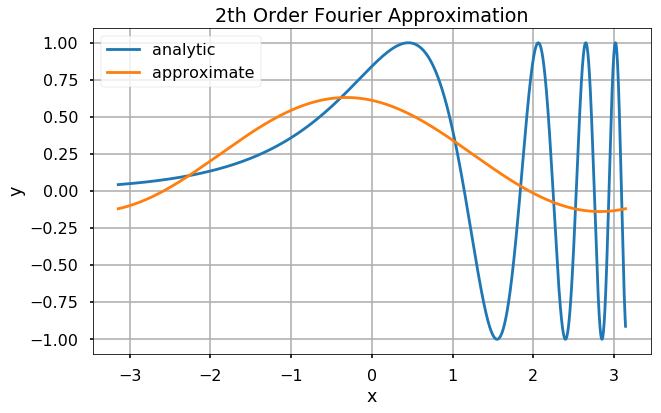

In [74]:
f = lambda x: np.sin(np.exp(x))
N = 2
plot_results(f, N)

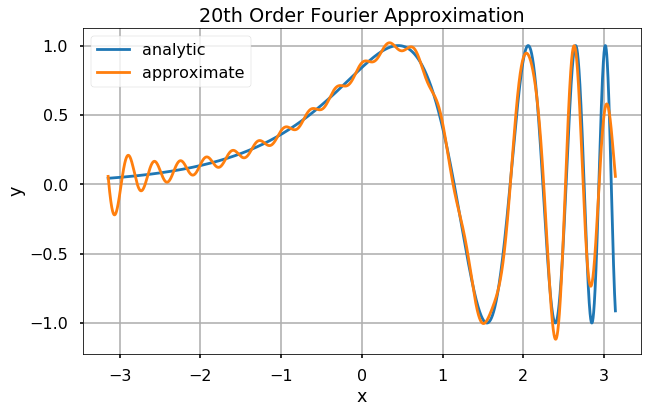

In [76]:
N = 20
plot_results(f, N)

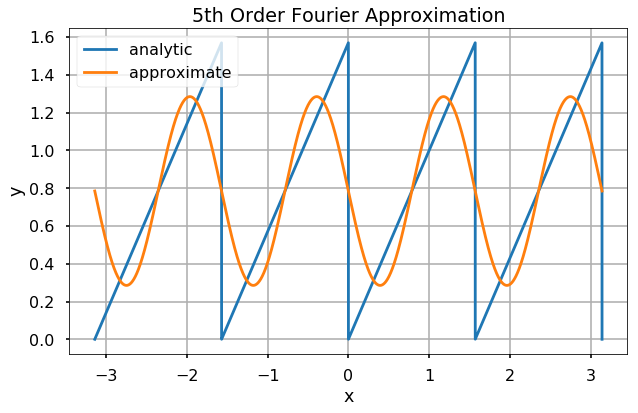

In [78]:
f = lambda x: np.mod(x, np.pi/2)
N = 5
plot_results(f, N)

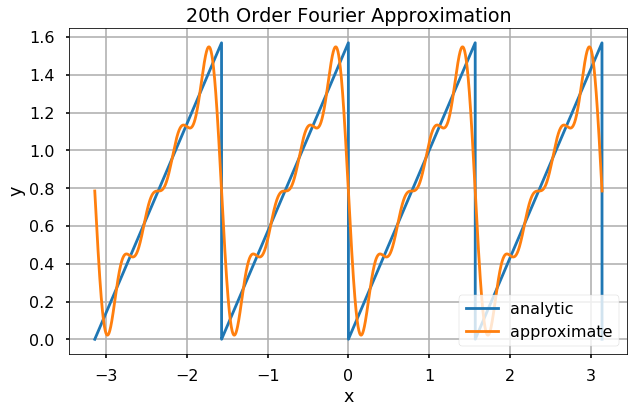

In [80]:
N = 20
plot_results(f, N)

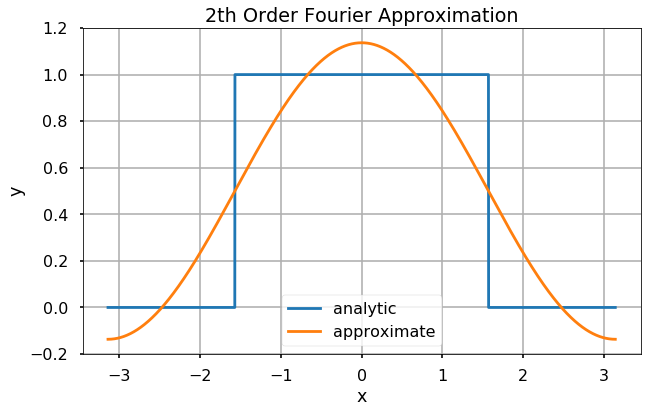

In [82]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2
plot_results(f, N)

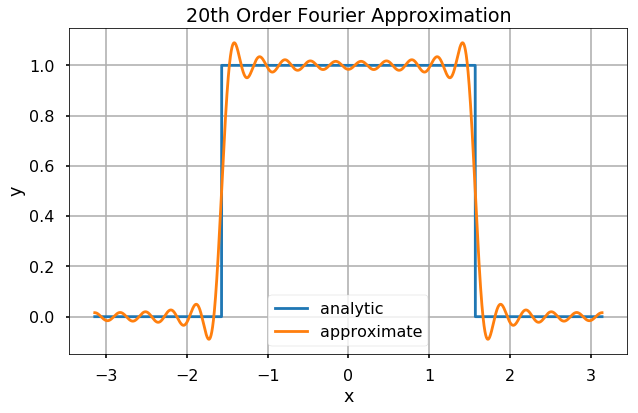

In [84]:
N = 20
plot_results(f, N)

<!--NAVIGATION-->
< [21.5 Computing Integrals in Python](chapter21.05-Computing-Integrals-in-Python.ipynb) | [Contents](Index.ipynb) | [CHAPTER 22. Ordinary Differential Equations (ODEs): Initial-Value Problems](chapter22.00-ODE-Initial-Value-Problems.ipynb) >